In [2]:
import numpy as np 
import pandas as pd

In [3]:
link = "http://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data"
raw_data = pd.read_csv(link, header=None, encoding='utf-8')
raw_data.columns = [ 'ID','Clump Thickness','Uniformity of Cell Size','Uniformity of Cell Shape',
                    'Marginal Adhesion','Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin' ,
                    'Normal Nucleoli', 'Mitoses', 'Class']
raw_data = raw_data.replace('?', np.nan)
raw_data.head()

,ID,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [6]:
X, Y = raw_data.iloc[ : , 1:-1].values, raw_data.iloc[:, -1:].values

In [7]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values = np.nan, strategy = 'median')
imp= imp.fit(X)
X = imp.transform(X)

In [8]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

Y[0] = LabelEncoder().fit_transform(Y[0])
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [9]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

#sc_X = MinMaxScaler(feature_range=(0,1))
sc_X = StandardScaler()
X_train_std= sc_X.fit_transform(X_train)
X_test_std = sc_X.fit_transform(X_test)

Text(0.5, 1.0, 'Scaled data')

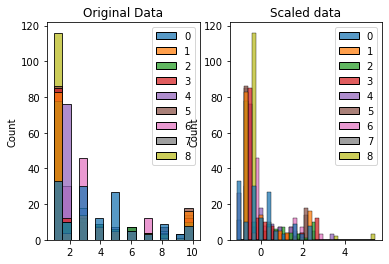

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,2)
sns.histplot(X_test, ax=ax[0])
ax[0].set_title("Original Data")
sns.histplot(X_test_std, ax=ax[1])
ax[1].set_title("Scaled data")

In [14]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train_std, Y_train)

knn.score(X_test_std, Y_test)

/home/apehooman/venv/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.9857142857142858